In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('wdbc.data', header= None)

In [24]:
features =  ['x{}'.format(i) for  i in range(30)]
dependent_variable = ['y']
df.columns = ['id'] + dependent_variable  + features

In [23]:
df.head()

,id,y,x0,x1,x2,x3,x4,x5,x6,x7,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
## initial analysis to identify feature's significance on the dependent variable
df[features + dependent_variable].groupby('y').mean()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
y,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


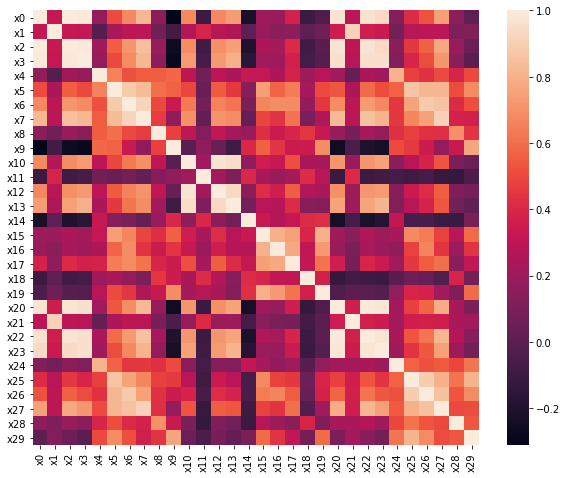

In [37]:
corrMatrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=False)
plt.title('Correlation Matrix of the features')
plt.show()

In [40]:
X,y = df[features], df['y']

#### 1.Decision Tree Model

In [86]:
clf = DecisionTreeClassifier(random_state= 42)
scores = cross_val_score(clf, X, y, cv=5)
mean_cross_val_accuracy = round(np.mean(scores), 3)
print('The mean cross validation score for a base decision tree model is {}'.format(mean_cross_val_accuracy))

The mean cross validation score for a base decision tree model is 0.917


Attempt at hyperparameter tuning to make a better decision tree

In [87]:
parameters = {'min_samples_split':[2,3, 5, 10, 20], 'max_depth':[4,6,10,15,20,50]}
dt = DecisionTreeClassifier(random_state= 42)
clf = GridSearchCV(dt, parameters, n_jobs= 3)
clf.fit(X, y)

print('Best Params: {} and best cross val accuracy is {}'.format(clf.best_params_, round(clf.best_score_,3)))

Best Params: {'max_depth': 4, 'min_samples_split': 2} and best cross val accuracy is 0.921


#### 2. Random Forest Model

In [72]:
clf = RandomForestClassifier(random_state= 42)
scores = cross_val_score(clf, X, y, cv=5)
mean_cross_val_accuracy = round(np.mean(scores), 3)
print('The mean cross validation score for a base random forest model is {}'.format(mean_cross_val_accuracy))

The mean cross validation score for a base random forest model is 0.956


Effect of increasing the estimators on the cross validation accuracy

In [94]:
estimators = [5,50,100,200,400,600, 800, 1000]
val_accuracies = []
for i in estimators:
    clf = RandomForestClassifier(random_state= 42, n_estimators = i)
    scores = cross_val_score(clf, X, y, cv=5)
    mean_cross_val_accuracy = round(np.mean(scores), 3)
    val_accuracies.append(mean_cross_val_accuracy)
    print("for # of estimatoes: {}, the val accuracy is {}".format(i, round(mean_cross_val_accuracy,3)))


for # of estimatoes: 5, the val accuracy is 0.951
for # of estimatoes: 50, the val accuracy is 0.954
for # of estimatoes: 100, the val accuracy is 0.956
for # of estimatoes: 200, the val accuracy is 0.954
for # of estimatoes: 400, the val accuracy is 0.963
for # of estimatoes: 600, the val accuracy is 0.963
for # of estimatoes: 800, the val accuracy is 0.961
for # of estimatoes: 1000, the val accuracy is 0.963


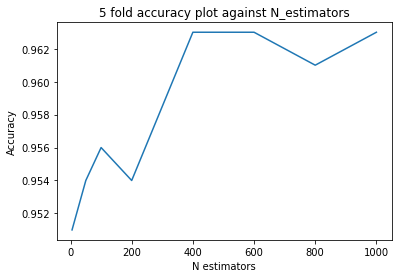

In [95]:
plt.plot(estimators, val_accuracies)
plt.title("5 fold accuracy plot against N_estimators")
plt.ylabel("Accuracy")
plt.xlabel("N estimators")
plt.show()

Effect of increasing the Feature Subset size on the cross validation accuracy

In [99]:
max_features = [4,6,8,10,12,16,24,30]
val_accuracies = []
for i in max_features:
    clf = RandomForestClassifier(random_state= 42, max_features = i, n_estimators = 400)
    scores = cross_val_score(clf, X, y, cv=5)
    mean_cross_val_accuracy = round(np.mean(scores), 3)
    val_accuracies.append(mean_cross_val_accuracy)
    print("for max_features: {}, the val accuracy is {}".format(i, round(mean_cross_val_accuracy,3)))


for # of estimatoes: 4, the val accuracy is 0.961
for # of estimatoes: 8, the val accuracy is 0.958
for # of estimatoes: 12, the val accuracy is 0.961
for # of estimatoes: 16, the val accuracy is 0.96
for # of estimatoes: 24, the val accuracy is 0.96
for # of estimatoes: 30, the val accuracy is 0.96


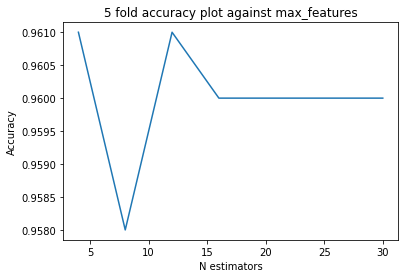

In [101]:
plt.plot(max_features, val_accuracies)
plt.title("5 fold accuracy plot against max_features")
plt.ylabel("Accuracy")
plt.xlabel("Max Features")
plt.show()

Attempt at hyperparameter tuning to make a better RF model by tuning max_features and n_estimators

In [102]:
parameters = {'max_features':max_features, 'n_estimators':estimators}
rf = RandomForestClassifier(random_state= 42)
clf = GridSearchCV(rf, parameters, n_jobs= 3)
clf.fit(X, y)

print('Best Params: {} and best cross val accuracy is {}'.format(clf.best_params_, round(clf.best_score_,3)))

Best Params: {'max_features': 4, 'n_estimators': 200} and best cross val accuracy is 0.965


#### Attempt at Feature Engineering
We do see that a few variables are heavily correlated in the eda provided above, we try to remove that and revaluate the model.


In [125]:
a, b = np.where(df[features].corr() > 0.98)
for i,j in zip(a,b):
    if i !=j:
        print(features[i],features[j])

x0 x2
x0 x3
x2 x0
x2 x3
x3 x0
x3 x2
x20 x22
x20 x23
x22 x20
x23 x20


In [126]:
new_featues = [i for i in features if i not in ('x2','x3','x22','x23')]

In [127]:
X_new,y_new = df[new_featues], df['y']

In [128]:
parameters = {'max_features':max_features, 'n_estimators':estimators}
rf = RandomForestClassifier(random_state= 42)
clf = GridSearchCV(rf, parameters, n_jobs= 3)
clf.fit(X_new, y_new)

print('Best Params: {} and best cross val accuracy is {}'.format(clf.best_params_, round(clf.best_score_,3)))

Best Params: {'max_features': 8, 'n_estimators': 50} and best cross val accuracy is 0.965
